<a href="https://colab.research.google.com/github/wanghongree/temp_drafts/blob/main/calibrate_CIFAR10_find_learning_rate_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
import os
import shutil

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
if os.path.exists('logs'):
    shutil.rmtree('logs')
os.mkdir('logs')

if os.path.exists('saved_model'):
    shutil.rmtree('saved_model')
os.mkdir('saved_model')

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Make sure images have shape (32, 32, 1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
batch_end_loss = list()

class SaveBatchLoss(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        batch_end_loss.append(logs['loss'])


In [ ]:
my_callbacks = [#tf.keras.callbacks.ModelCheckpoint(filepath='./saved_model/model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True), 
                #SaveBatchLoss()
                ]

In [ ]:
batch_size = 256
steps_per_epoch = 400
# learning_rate = 0.001
epochs = 300


In [ ]:
model_name = 'model222'

In [ ]:
kr=None
br=None

In [ ]:
def create_model():
  inputs = keras.Input(shape=input_shape)
  short_cut1 = layers.Conv2D(32, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(inputs)
  short_cut1 = layers.BatchNormalization()(short_cut1)
  x = layers.Conv2D(32, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(inputs)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.Conv2D(32, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.Conv2D(32, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  x = layers.BatchNormalization()(x)
  x = layers.Add()([short_cut1, x])
  x = layers.ReLU()(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)
  short_cut2 = layers.Conv2D(64, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  short_cut2 = layers.BatchNormalization()(short_cut2)
  x = layers.Conv2D(64, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.Conv2D(64, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  x = layers.BatchNormalization()(x)  
  x = layers.ReLU()(x)
  x = layers.Conv2D(64, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  x = layers.BatchNormalization()(x)
  x = layers.Add()([short_cut2, x])
  x = layers.ReLU()(x)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Flatten()(x)
  # x = layers.Dropout(0.5)(x)
  x = layers.Dense(num_classes, activation="softmax", kernel_regularizer = kr, bias_regularizer = br)(x)
  model =  tf.keras.Model(inputs, x, name=model_name)
  return model

In [ ]:
# model.count_params()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
import pickle

In [ ]:
lrs = [ 0.005]

for learning_rate in lrs:
  opt = SGD(learning_rate = learning_rate)
  model = create_model()
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
  history = model.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_test, y_test), steps_per_epoch = steps_per_epoch, epochs=epochs, verbose=1, callbacks=my_callbacks, shuffle = True)
  with open(f'history-lr-{learning_rate}.pkl', 'wb') as config_dictionary_file:
    pickle.dump(history, config_dictionary_file)


Epoch 1/300
400/400 [==============================] - 26s 43ms/step - loss: 1.9168 - accuracy: 0.3090 - val_loss: 2.1555 - val_accuracy: 0.2047
Epoch 2/300
400/400 [==============================] - 17s 42ms/step - loss: 1.6633 - accuracy: 0.4033 - val_loss: 1.6044 - val_accuracy: 0.4241
Epoch 3/300
400/400 [==============================] - 17s 43ms/step - loss: 1.5565 - accuracy: 0.4454 - val_loss: 1.5184 - val_accuracy: 0.4550
Epoch 4/300
400/400 [==============================] - 17s 42ms/step - loss: 1.4816 - accuracy: 0.4752 - val_loss: 1.5198 - val_accuracy: 0.4643
Epoch 5/300
400/400 [==============================] - 17s 42ms/step - loss: 1.4175 - accuracy: 0.5004 - val_loss: 1.4094 - val_accuracy: 0.4948
Epoch 6/300
400/400 [==============================] - 17s 42ms/step - loss: 1.3638 - accuracy: 0.5198 - val_loss: 1.3657 - val_accuracy: 0.5064
Epoch 7/300
400/400 [==============================] - 17s 42ms/step - loss: 1.3108 - accuracy: 0.5402 - val_loss: 1.7015 - val_ac

400/400 [==============================] - 1s 2ms/step - loss: 0.2386 - accuracy: 0.9278 - val_loss: 0.8086 - val_accuracy: 0.7430


In [ ]:
lrs = [0.005]
history_result={}
for learning_rate in lrs:
  file_name = f'history-lr-{learning_rate}.pkl'
  with open(file_name, "rb") as input_file:
    history_result[file_name] = pickle.load(input_file)


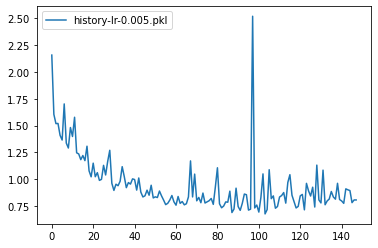

In [ ]:
handle = []
for file_name in history_result.keys():
  y = history_result[file_name].history['val_loss']
  plt.plot(y, label = file_name)

plt.legend()



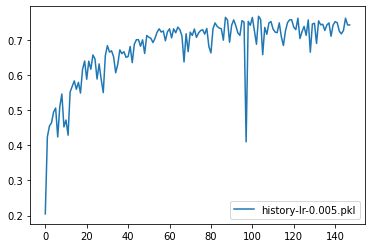

In [ ]:
handle = []
for file_name in history_result.keys():
  y = history_result[file_name].history['val_accuracy']
  plt.plot(y, label = file_name)

plt.legend()



In [ ]:
history_result[f'history-lr-{learning_rate}'].history['loss']

In [ ]:

plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
# plt.title('lrate='+str(learning_rate), pad=-50)
plt.legend()
# show learning curves
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label='test')
# plt.title('lrate='+str(learning_rate), pad=-50)
plt.legend()
# show learning curves
plt.show()

In [ ]:
history.history.keys()

In [ ]:
yhat = model.predict(x_test)
results = model.evaluate(x_test, y_test, batch_size=128)